<a href="https://colab.research.google.com/github/Aadhil21/DSGP-Group28/blob/branch-Aadhil/Analyze_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries


In [96]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math

In [97]:
video_name = 'PushUp.mp4'
video_path = 'Videos/' + video_name
dataset_name = 'pose_landmark_data_' + video_name.split('.')[0] + '.xlsx'
dataset_path = 'Datasets/'

##Read keypoints data

In [98]:
df = pd.read_excel(dataset_path + dataset_name)

##Remove z keypoints

In [99]:
for i in df.columns:
    if i.split('_')[-1] == 'z':
        df.drop(i, axis=1, inplace=True)

In [100]:
df.head()

,Frame_Number,NOSE_Point_x,NOSE_Point_y,NOSE_visibility,LEFT_EYE_INNER_Point_x,LEFT_EYE_INNER_Point_y,LEFT_EYE_INNER_visibility,LEFT_EYE_Point_x,LEFT_EYE_Point_y,LEFT_EYE_visibility,...,LEFT_HEEL_visibility,RIGHT_HEEL_Point_x,RIGHT_HEEL_Point_y,RIGHT_HEEL_visibility,LEFT_FOOT_INDEX_Point_x,LEFT_FOOT_INDEX_Point_y,LEFT_FOOT_INDEX_visibility,RIGHT_FOOT_INDEX_Point_x,RIGHT_FOOT_INDEX_Point_y,RIGHT_FOOT_INDEX_visibility
0,1,0.749870,0.333902,1.000000,0.761684,0.294129,1.000000,0.764440,0.291671,1.000000,...,0.946941,0.119090,0.588160,0.988099,0.215592,0.704147,0.995109,0.136848,0.712629,0.998906
1,2,0.750657,0.334275,0.999997,0.761940,0.295262,0.999995,0.764490,0.292590,0.999996,...,0.899326,0.121186,0.586943,0.962764,0.199738,0.668285,0.976031,0.128918,0.693594,0.991539
2,3,0.751782,0.348170,0.999997,0.762878,0.311493,0.999996,0.765365,0.308184,0.999996,...,0.892021,0.118160,0.594235,0.959269,0.751947,0.828937,0.974637,0.134328,0.693964,0.990611
3,4,0.751633,0.365366,0.999982,0.762858,0.330576,0.999977,0.765363,0.327432,0.999978,...,0.828289,0.129823,0.576711,0.908669,0.241413,0.680833,0.922253,0.135757,0.665319,0.959555
4,5,0.753894,0.383222,0.999970,0.765311,0.348857,0.999960,0.767878,0.345301,0.999961,...,0.761545,0.115404,0.594929,0.857837,0.203603,0.671023,0.871395,0.141919,0.709008,0.934862


##Get column name

In [101]:
num = 0
for i in range(len(df.columns[1:])):
    if i != 0 and i % 2 != 0:
        num += 1
        print(num, df.columns[i], df.columns[i + 1])

1 NOSE_Point_x NOSE_Point_y
2 NOSE_visibility LEFT_EYE_INNER_Point_x
3 LEFT_EYE_INNER_Point_y LEFT_EYE_INNER_visibility
4 LEFT_EYE_Point_x LEFT_EYE_Point_y
5 LEFT_EYE_visibility LEFT_EYE_OUTER_Point_x
6 LEFT_EYE_OUTER_Point_y LEFT_EYE_OUTER_visibility
7 RIGHT_EYE_INNER_Point_x RIGHT_EYE_INNER_Point_y
8 RIGHT_EYE_INNER_visibility RIGHT_EYE_Point_x
9 RIGHT_EYE_Point_y RIGHT_EYE_visibility
10 RIGHT_EYE_OUTER_Point_x RIGHT_EYE_OUTER_Point_y
11 RIGHT_EYE_OUTER_visibility LEFT_EAR_Point_x
12 LEFT_EAR_Point_y LEFT_EAR_visibility
13 RIGHT_EAR_Point_x RIGHT_EAR_Point_y
14 RIGHT_EAR_visibility MOUTH_LEFT_Point_x
15 MOUTH_LEFT_Point_y MOUTH_LEFT_visibility
16 MOUTH_RIGHT_Point_x MOUTH_RIGHT_Point_y
17 MOUTH_RIGHT_visibility LEFT_SHOULDER_Point_x
18 LEFT_SHOULDER_Point_y LEFT_SHOULDER_visibility
19 RIGHT_SHOULDER_Point_x RIGHT_SHOULDER_Point_y
20 RIGHT_SHOULDER_visibility LEFT_ELBOW_Point_x
21 LEFT_ELBOW_Point_y LEFT_ELBOW_visibility
22 RIGHT_ELBOW_Point_x RIGHT_ELBOW_Point_y
23 RIGHT_ELBOW_visibi

##Calculate angle function

In [102]:
# Assuming df is your DataFrame
def calculate_angle(row):
    import math
    # Accessing columns by their index positions (0 to 5) from the row
    radians = math.atan2(row[5] - row[3], row[4] - row[2]) - math.atan2(row[1] - row[3], row[0] - row[2])
    angle = math.degrees(radians)
    if angle < 0:
        angle += 360
    # if angle >= -50:
    #   angle = -50
    return angle

##New dataframe for angles

In [103]:
Angles_df = pd.DataFrame()
Angles_df['Frame_Number'] = df['Frame_Number']
Angles_df

,Frame_Number
0,1
1,2
2,3
3,4
4,5
...,...
296,297
297,298
298,299
299,300


##Generate angles from keypoints

In [104]:
Angle_At_Right_Elbow = df[[
    'RIGHT_WRIST_Point_x', 'RIGHT_WRIST_Point_y', 
    'RIGHT_ELBOW_Point_x', 'RIGHT_ELBOW_Point_y',
    'RIGHT_SHOULDER_Point_x', 'RIGHT_SHOULDER_Point_y']]

Angles_df['Angle_At_Right_Elbow'] = Angle_At_Right_Elbow.apply(calculate_angle, axis=1)

Angle_At_Left_Elbow = df[[
    'LEFT_WRIST_Point_x', 'LEFT_WRIST_Point_y', 
     'LEFT_ELBOW_Point_x', 'LEFT_ELBOW_Point_y', 
     'LEFT_SHOULDER_Point_x','LEFT_SHOULDER_Point_y']]
Angles_df['Angle_At_Left_Elbow'] = Angle_At_Left_Elbow.apply(calculate_angle, axis=1)

# Calculate angle at right shoulder
Angle_At_Right_Shoulder = df[[
    'RIGHT_ELBOW_Point_x', 'RIGHT_ELBOW_Point_y',
    'RIGHT_SHOULDER_Point_x', 'RIGHT_SHOULDER_Point_y',
    'RIGHT_HIP_Point_x', 'RIGHT_HIP_Point_y'
]]
Angles_df['Angle_At_Right_Shoulder'] = Angle_At_Right_Shoulder.apply(calculate_angle, axis=1)

# Calculate angle at left shoulder
Angle_At_Left_Shoulder = df[[
    'LEFT_ELBOW_Point_x', 'LEFT_ELBOW_Point_y',
    'LEFT_SHOULDER_Point_x', 'LEFT_SHOULDER_Point_y',
    'LEFT_HIP_Point_x', 'LEFT_HIP_Point_y'
]]
Angles_df['Angle_At_Left_Shoulder'] = Angle_At_Left_Shoulder.apply(calculate_angle, axis=1)

# Calculate angle at right knee (example)
Angle_At_Right_Knee = df[[
    'RIGHT_HIP_Point_x', 'RIGHT_HIP_Point_y',
    'RIGHT_KNEE_Point_x', 'RIGHT_KNEE_Point_y',
    'RIGHT_ANKLE_Point_x', 'RIGHT_ANKLE_Point_y'
]]
Angles_df['Angle_At_Right_Knee'] = Angle_At_Right_Knee.apply(calculate_angle, axis=1)

# Calculate angle at left knee (example)
Angle_At_Left_Knee = df[[
    'LEFT_HIP_Point_x', 'LEFT_HIP_Point_y',
    'LEFT_KNEE_Point_x', 'LEFT_KNEE_Point_y',
    'LEFT_ANKLE_Point_x', 'LEFT_ANKLE_Point_y'
]]
Angles_df['Angle_At_Left_Knee'] = Angle_At_Left_Knee.apply(calculate_angle, axis=1)

# Calculate angle at right hip
Angle_At_Right_Hip = df[[
    'RIGHT_SHOULDER_Point_x', 'RIGHT_SHOULDER_Point_y',
    'RIGHT_HIP_Point_x', 'RIGHT_HIP_Point_y',
    'RIGHT_KNEE_Point_x', 'RIGHT_KNEE_Point_y'
]]
Angles_df['Angle_At_Right_Hip'] = Angle_At_Right_Hip.apply(calculate_angle, axis=1)

# Calculate angle at left hip
Angle_At_Left_Hip = df[[
    'LEFT_SHOULDER_Point_x', 'LEFT_SHOULDER_Point_y',
    'LEFT_HIP_Point_x', 'LEFT_HIP_Point_y',
    'LEFT_KNEE_Point_x', 'LEFT_KNEE_Point_y'
]]
Angles_df['Angle_At_Left_Hip'] = Angle_At_Left_Hip.apply(calculate_angle, axis=1)

# Calculate angle at neck (example)
Angle_At_Neck = df[[
    'LEFT_SHOULDER_Point_x', 'LEFT_SHOULDER_Point_y',
    'NOSE_Point_x', 'NOSE_Point_y',
    'RIGHT_SHOULDER_Point_x', 'RIGHT_SHOULDER_Point_y'
]]
Angles_df['Angle_At_Neck'] = Angle_At_Neck.apply(calculate_angle, axis=1)

## Check correlation

In [105]:
# Assuming df is your DataFrame containing the columns 'Angle_At_Left_Elbow' and 'Angle_At_Right_Elbow'
# Find correlations between columns
correlation_matrix = Angles_df.corr()

# Display correlations
print("Correlation Matrix:")
print(correlation_matrix)

# # Find correlations between columns
# for i in Angles_df.columns:
#     for j in Angles_df.columns:
#         if i != j:
#             correlation = Angles_df[i].corr(Angles_df[j])
#             print(f'Correlation between {i} and {j}: {correlation}')

Correlation Matrix:
                         Frame_Number  Angle_At_Right_Elbow   
Frame_Number                 1.000000              0.000795  \
Angle_At_Right_Elbow         0.000795              1.000000   
Angle_At_Left_Elbow         -0.003285              0.545112   
Angle_At_Right_Shoulder     -0.069578              0.493280   
Angle_At_Left_Shoulder      -0.007881              0.356775   
Angle_At_Right_Knee         -0.015475             -0.462098   
Angle_At_Left_Knee           0.053317              0.371510   
Angle_At_Right_Hip           0.027814             -0.413456   
Angle_At_Left_Hip           -0.006691             -0.545177   
Angle_At_Neck               -0.072912              0.331727   

                         Angle_At_Left_Elbow  Angle_At_Right_Shoulder   
Frame_Number                       -0.003285                -0.069578  \
Angle_At_Right_Elbow                0.545112                 0.493280   
Angle_At_Left_Elbow                 1.000000                 0.8199

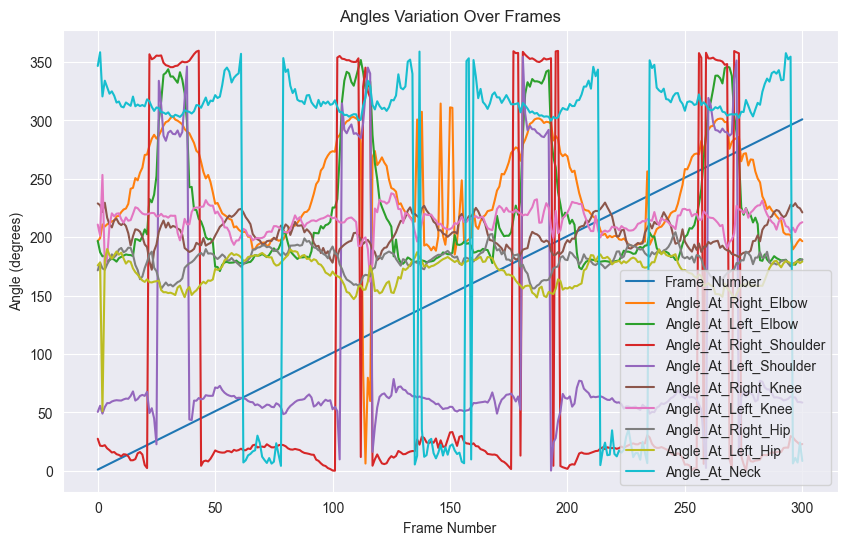

In [106]:
# Set 'Frame_Number' column as the index for easier plotting
Angles_df.set_index('Frame_Number', inplace=False)

# Plot all columns (angles) against the frame number
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
for column in Angles_df.columns:
    plt.plot(Angles_df.index, Angles_df[column], label=column)

plt.xlabel('Frame Number')
plt.ylabel('Angle (degrees)')
plt.title('Angles Variation Over Frames')
plt.legend()
plt.grid(True)
plt.show()

In [107]:
Angles_df

,Frame_Number,Angle_At_Right_Elbow,Angle_At_Left_Elbow,Angle_At_Right_Shoulder,Angle_At_Left_Shoulder,Angle_At_Right_Knee,Angle_At_Left_Knee,Angle_At_Right_Hip,Angle_At_Left_Hip,Angle_At_Neck
0,1,196.708131,196.877144,27.424555,50.438108,228.935158,210.836169,171.634743,175.875207,346.676204
1,2,199.207534,187.149437,21.501423,55.635484,227.426481,201.215322,178.172495,178.415771,358.401359
2,3,210.921525,183.675581,21.163784,48.959047,221.623289,253.379610,173.327972,50.910105,320.594519
3,4,209.117260,184.105788,21.905780,54.562925,229.546268,175.970800,172.142577,179.930806,334.069763
4,5,211.081010,179.703878,19.177235,57.938419,216.744380,181.814878,176.836564,189.899646,328.526870
...,...,...,...,...,...,...,...,...,...,...
296,297,189.575209,177.025609,28.634624,62.942328,226.533223,208.203787,177.363082,176.212488,6.267766
297,298,192.576275,176.445485,25.963159,62.796742,229.154748,204.326667,178.340658,178.219842,10.994344
298,299,195.852700,179.952209,24.273026,58.894967,225.882507,209.094465,179.045473,179.370178,7.086226
299,300,198.396144,181.320899,22.365457,58.895774,224.756624,211.768847,180.328102,177.847822,24.170237


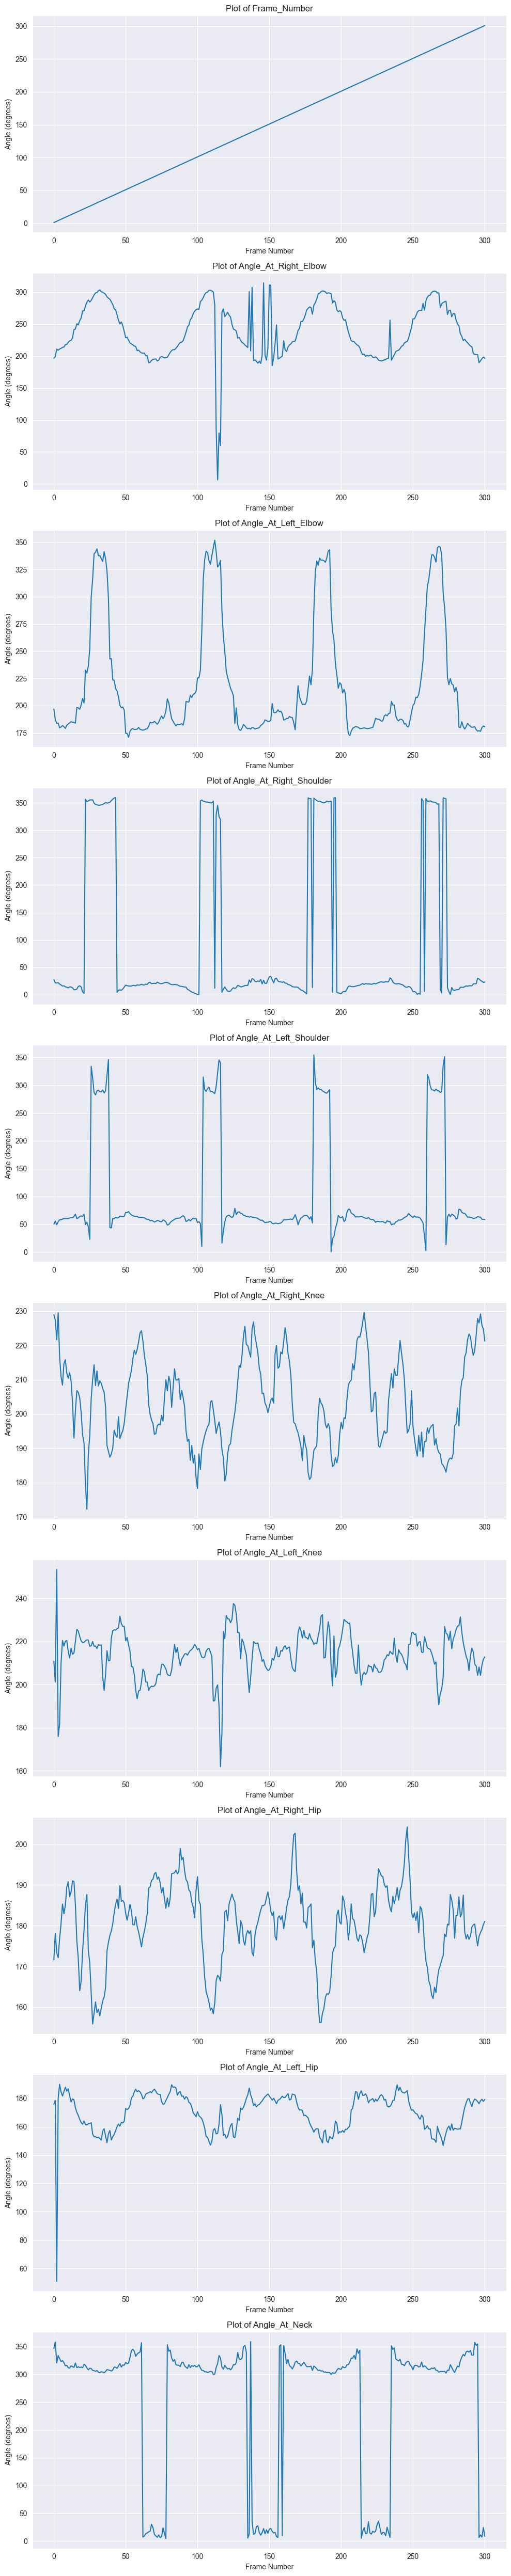

In [114]:
# Set 'Frame_Number' column as the index for easier plotting
Angles_df.set_index('Frame_Number', inplace=False)

# Plot each column (angle) against the frame number in separate subplots
fig, axes = plt.subplots(nrows=len(Angles_df.columns), ncols=1, figsize=(10, 5*len(Angles_df.columns)))

for i, column in enumerate(Angles_df.columns):
    ax = axes[i] if len(Angles_df.columns) > 1 else axes  # Select the appropriate subplot
    ax.plot(Angles_df.index, Angles_df[column])
    ax.set_xlabel('Frame Number')
    ax.set_ylabel('Angle (degrees)')
    ax.set_title(f'Plot of {column}')
    ax.grid(True)

plt.tight_layout()  # Adjust subplot layout to prevent overlapping
plt.show()

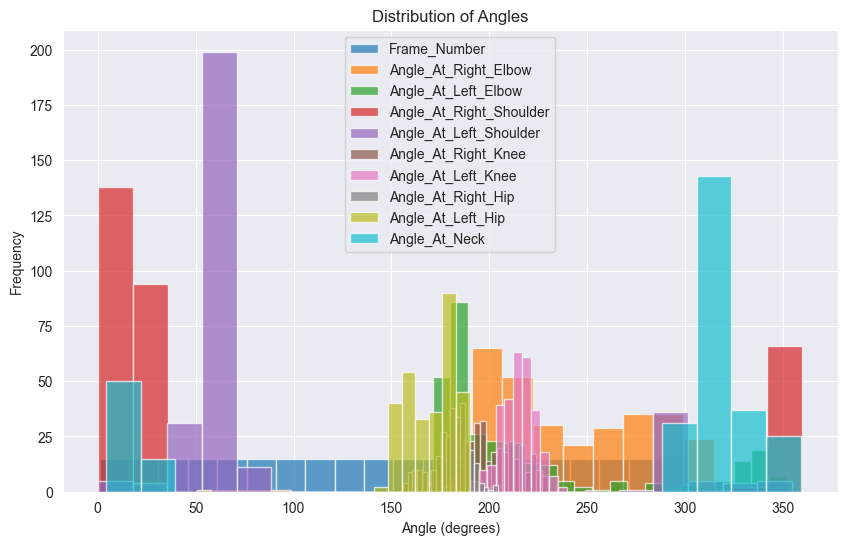

In [119]:
Angles_df.set_index('Frame_Number', inplace=False)

# Plot histograms for each column (angle) against the frame number
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
for column in Angles_df.columns:
    plt.hist(Angles_df[column], bins=20, alpha=0.7, label=column)

plt.xlabel('Angle (degrees)')
plt.ylabel('Frequency')
plt.title('Distribution of Angles')
plt.legend()
plt.grid(True)
plt.show()

##Check for outliers and similarity

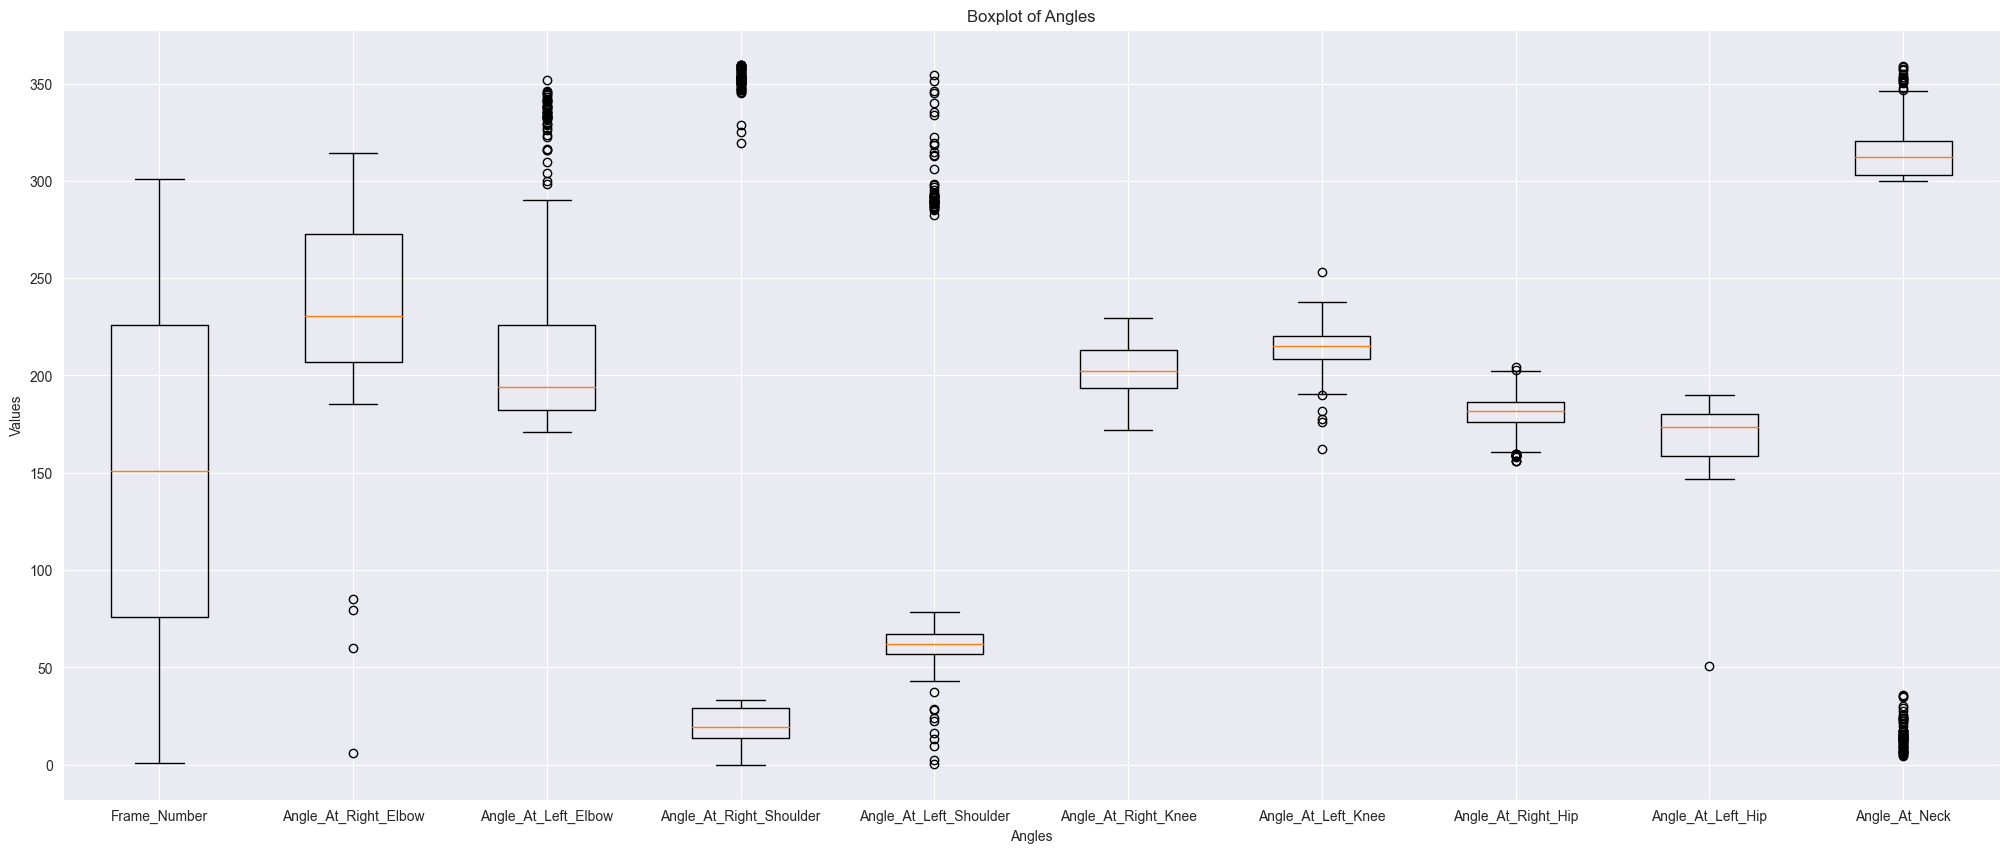

In [125]:
Angles_df.set_index('Frame_Number', inplace=False)

# Plot boxplots for each column (angle) against the frame number
plt.figure(figsize=(25, 10))  # Adjust figure size as needed
plt.boxplot(Angles_df.values, labels=Angles_df.columns)

plt.xlabel('Angles')
plt.ylabel('Values')
plt.title('Boxplot of Angles')
# plt.legend()
plt.grid(True)
plt.show()

##Normalize data

In [126]:
Angles_df

,Frame_Number,Angle_At_Right_Elbow,Angle_At_Left_Elbow,Angle_At_Right_Shoulder,Angle_At_Left_Shoulder,Angle_At_Right_Knee,Angle_At_Left_Knee,Angle_At_Right_Hip,Angle_At_Left_Hip,Angle_At_Neck
0,1,196.708131,196.877144,27.424555,50.438108,228.935158,210.836169,171.634743,175.875207,346.676204
1,2,199.207534,187.149437,21.501423,55.635484,227.426481,201.215322,178.172495,178.415771,358.401359
2,3,210.921525,183.675581,21.163784,48.959047,221.623289,253.379610,173.327972,50.910105,320.594519
3,4,209.117260,184.105788,21.905780,54.562925,229.546268,175.970800,172.142577,179.930806,334.069763
4,5,211.081010,179.703878,19.177235,57.938419,216.744380,181.814878,176.836564,189.899646,328.526870
...,...,...,...,...,...,...,...,...,...,...
296,297,189.575209,177.025609,28.634624,62.942328,226.533223,208.203787,177.363082,176.212488,6.267766
297,298,192.576275,176.445485,25.963159,62.796742,229.154748,204.326667,178.340658,178.219842,10.994344
298,299,195.852700,179.952209,24.273026,58.894967,225.882507,209.094465,179.045473,179.370178,7.086226
299,300,198.396144,181.320899,22.365457,58.895774,224.756624,211.768847,180.328102,177.847822,24.170237


##Save angles data to excel file

In [127]:
file_name = 'angles_data_' + video_name.split('.')[0] + '.xlsx'

Angles_df.to_excel(dataset_path + '/' + file_name, index=False)

print(f"Data saved to {file_name}")

Data saved to angles_data_PushUp.xlsx
